## **Importing useful and essential libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Import and Preprocessing**

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
mobiledata = pd.read_csv('mobiledata.csv')

In [104]:
mobiledata.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,has_4G,int_memory_GB,mobile_depth,mobile_width,n_cores,back_camera_MP,px_height,px_width,ram_MB,sc_h,sc_w,talk_time,has_3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,medium price
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,high price
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,high price
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,high price
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,medium price


So, here we have our label as price_range. We need to classify our label into four categories: 

1.   low price
2.   medium price
3.   high price
4.   very high price


















**Checking For null values and Number of categorical variables**

In [105]:
mobiledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power      2000 non-null int64
bluetooth          2000 non-null int64
clock_speed        2000 non-null float64
dual_sim           2000 non-null int64
front_camera_MP    2000 non-null int64
has_4G             2000 non-null int64
int_memory_GB      2000 non-null int64
mobile_depth       2000 non-null float64
mobile_width       2000 non-null int64
n_cores            2000 non-null int64
back_camera_MP     2000 non-null int64
px_height          2000 non-null int64
px_width           2000 non-null int64
ram_MB             2000 non-null int64
sc_h               2000 non-null int64
sc_w               2000 non-null int64
talk_time          2000 non-null int64
has_3G             2000 non-null int64
touch_screen       2000 non-null int64
wifi               2000 non-null int64
price_range        2000 non-null object
dtypes: float64(2), int64(18), object(1)
memory usage: 328.2+ KB


In [106]:
mobiledata.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,has_4G,int_memory_GB,mobile_depth,mobile_width,n_cores,back_camera_MP,px_height,px_width,ram_MB,sc_h,sc_w,talk_time,has_3G,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


Since, we have categorical variable price_range, we need to encode that variable

In [0]:
mobiledata["price_range"].replace(["low price","medium price","high price","very high price"],[0,1,2,3],inplace=True)


In [108]:
mobiledata.shape

(2000, 21)

As we can see, scale of variables is very different, before we directly plug this dataset into our model, we need to scale our features. But before that let's explore our dataset.

# **Exploratory Data Analysis**

In [109]:
corr_matrix = mobiledata.corr()
corr_matrix["price_range"].sort_values(ascending=False)


price_range        1.000000
ram_MB             0.917046
battery_power      0.200723
px_width           0.165818
px_height          0.148858
int_memory_GB      0.044435
sc_w               0.038711
back_camera_MP     0.033599
has_3G             0.023611
sc_h               0.022986
front_camera_MP    0.021998
talk_time          0.021859
bluetooth          0.020573
wifi               0.018785
dual_sim           0.017444
has_4G             0.014772
n_cores            0.004399
mobile_depth       0.000853
clock_speed       -0.006606
mobile_width      -0.030302
touch_screen      -0.030411
Name: price_range, dtype: float64

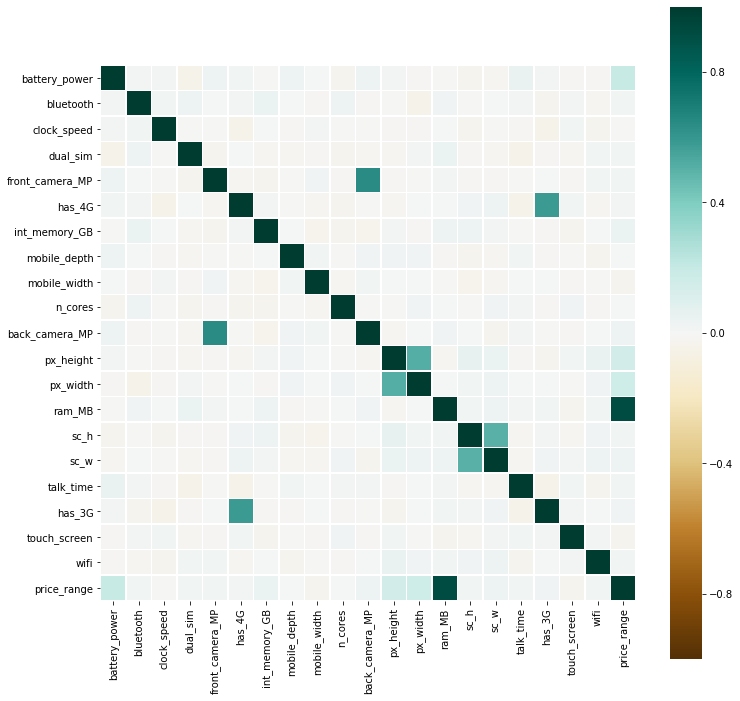

In [110]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True, linewidths=.5,fmt='.2f',cmap="BrBG")

**Analysis of above correlation plot**

Here, we have plotted correlation plot to check for feature importnce. As you can see for classifying our label 'Price Range', some important features are as follows -> Ram_MB, px_width, px_height, int_memory_GB etc. There are also few features such as clock_speed, mobile_width,touch_screen which are negatively correlated with our label 'price_range'. 




In [111]:
feat_values=corr_matrix["price_range"].sort_values(ascending = False)
dicti=dict(feat_values)
labels=list(dicti.keys())
values = list(dicti.values())
labels = labels[1:]
values = values[1:]
minimum = min(values)
maximum = max(values)
colors = ['lightslategray',] * len(labels)
colors[values.index(minimum)] = 'crimson'
colors[values.index(maximum)] = 'green'
# print(labels)
# print(list(np.round(values,5)))
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='positively strongest correlated feature in green -> ram_MB | Negatively strongest correlated feature in Red -> touch_screen')

As we can see from above graph **ram_MB** is shown in green which indicates the **strongest correlation** with price_range, while *`touch_screen`* is shown in red which indicates the *`Negatively correlated`* with price_range.
Here, mobile_depth has the weakest correlation with price_range.

In [112]:
labels=['mobiles with wifi', 'mobiles without wifi']
values=mobiledata["wifi"].value_counts().values
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.show()

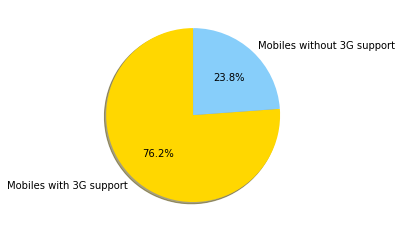

In [113]:
labels = ["Mobiles with 3G support",'Mobiles without 3G support']
values = mobiledata['has_3G'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

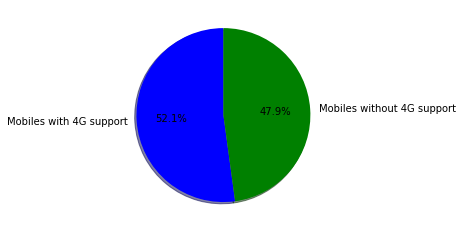

In [114]:
labels = ["Mobiles with 4G support",'Mobiles without 4G support']
values = mobiledata['has_4G'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['blue', 'green']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

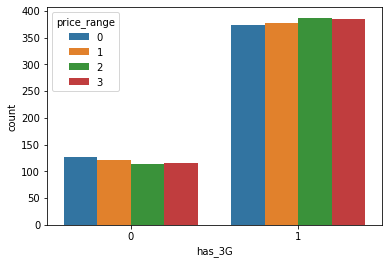

In [115]:
sns.countplot(x = mobiledata["has_3G"],hue="price_range",data=mobiledata)

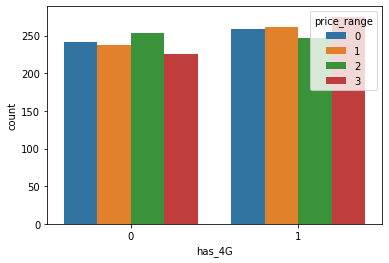

In [116]:
sns.countplot(x = mobiledata["has_4G"],hue="price_range",data=mobiledata)

Here in above two graphs, as we can see that those mobiles which have 3G have very high price in comparison to those which do not have 3G. On the other hand, those with 4G and without 4G are almost of same price. So, from these two charts, we can infer that has_3G feature is contributing more to price_range as compared to has_4G feature.

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_camera_MP, dtype: int64

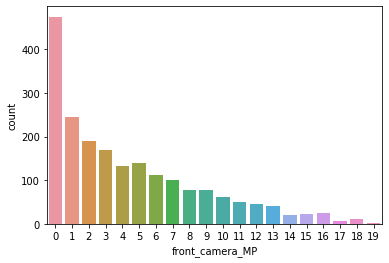

In [117]:
sns.countplot(x = "front_camera_MP" , data=mobiledata)
mobiledata["front_camera_MP"].value_counts()

Most of the phones(474 devices) have front camrera of 0 mega-pixels means they do not have the front camera.


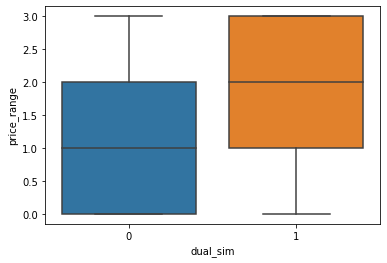

In [118]:
sns.boxplot(x='dual_sim',y='price_range',data=mobiledata)
plt.show()

phones that have dual-sim are more costlier than phones without dual-sim

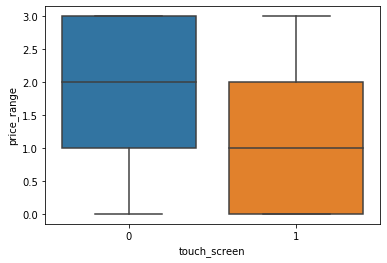

In [119]:
sns.boxplot(x='touch_screen',y='price_range',data=mobiledata)
plt.show()

phones without touch screen are more costlier than phones with touch screen.
wait..what? Strange..! I know but we have such data. In real life this scenario is never the same...!

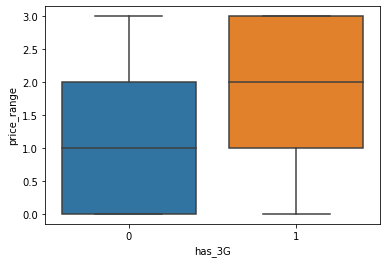

In [120]:
sns.boxplot(x='has_3G',y='price_range',data=mobiledata)
plt.show()

# **Classification**

# **Logistic Regression without scaling**

In [0]:
mobiledata = pd.read_csv('mobiledata.csv')
mobiledata["price_range"].replace(["low price","medium price","high price","very high price"],[0,1,2,3],inplace=True)



In [0]:
features = mobiledata.drop("price_range",axis=1).values
target = mobiledata["price_range"].values

In [123]:
features.shape , target.shape

((2000, 20), (2000,))

In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(features,target,test_size = 0.2,random_state = 42)

In [125]:
from sklearn.linear_model import LogisticRegression
lrobject = LogisticRegression()
lrobject.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
print(lrobject.score(Xtrain,ytrain) * 100, "% training accuracy")
print(lrobject.score(Xtest,ytest) * 100 , "% testing accuracy ")

80.25 % training accuracy
80.75 % testing accuracy 


# **Logistic Regression With Scaling**



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
features_scaled = scaler.fit_transform(features)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(features_scaled,target,test_size = 0.2,random_state = 42)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
ypred = lr.predict(Xtest)

In [130]:
print(lr.score(Xtrain,ytrain) * 100,"% training accuracy")
print(lr.score(Xtest,ytest) * 100,"% testing accuracy")


85.625 % training accuracy
85.0 % testing accuracy


# **Cross Validation Scores for training errors**

In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,Xtrain,ytrain,scoring = "accuracy",cv=10)
scores

array([0.80745342, 0.86956522, 0.8447205 , 0.80745342, 0.80124224,
       0.83125   , 0.88125   , 0.7625    , 0.80379747, 0.79617834])

In [132]:
print(np.round(np.mean(scores)*100,2) , "% training accuracy with 10-fold cross validation")

82.05 % training accuracy with 10-fold cross validation


# **Tuning of Hyper Parameters**

In [0]:
param_grid = [{'penalty':['l1', 'l2'],'solver':['liblinear', 'saga'],"multi_class":['ovr'],'C':np.logspace(0, 4, 10)},
              {'penalty':['l2'],'solver':['newton-cg', 'lbfgs','sag'],'multi_class':['multinomial']}]
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()
clf = GridSearchCV(logistic, param_grid, cv=5, verbose=0,n_jobs= -1, scoring="accuracy")



In [134]:
clf.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': array([1.00000000...69e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'multi_class'

In [135]:
print(clf.best_params_, "are the best hyper-parameters for our model")

{'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'} are the best hyper-parameters for our model


In [0]:
ypred = clf.best_estimator_.predict(Xtest)

In [137]:
print(clf.best_estimator_.score(Xtrain,ytrain)*100,"% training accuracy after hyper-parameter tuning ")
print(clf.best_estimator_.score(Xtest,ytest)*100 ,"% testing accuracy after hyper-parameter tuning")

97.5625 % training accuracy after hyper-parameter tuning 
97.75 % testing accuracy after hyper-parameter tuning


# **Evaluation - Confusion Metrics and Accuracy, Precision, Recall**  

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm = pd.DataFrame(cm, columns=["low price","medium price","high price","very high price"],index=["low price","medium price","high price","very high price"])
print("Confusion matrix after tuning parameters:")
cm

Confusion matrix after tuning parameters:


,low price,medium price,high price,very high price
low price,102,3,0,0
medium price,0,91,0,0
high price,0,2,87,3
very high price,0,0,1,111


In [139]:
target_names = ["Low price","Medium price","High Price","Very High Price"]
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred,target_names=target_names))


                 precision    recall  f1-score   support

      Low price       1.00      0.97      0.99       105
   Medium price       0.95      1.00      0.97        91
     High Price       0.99      0.95      0.97        92
Very High Price       0.97      0.99      0.98       112

       accuracy                           0.98       400
      macro avg       0.98      0.98      0.98       400
   weighted avg       0.98      0.98      0.98       400



# **Manual Feature Selection to remove unnecessary features and to improve accuracy**

In [0]:
corr_matrix = mobiledata.corr()
feature_selection=corr_matrix["price_range"].sort_values(ascending=False)[:11]
top_features_dict=(feature_selection.to_dict())
top_10_features=list(top_features_dict.keys())
# top_10_features     #top 10 features + our lable price_range

In [141]:
mobiledata = mobiledata[top_10_features]
mobiledata.head(10)

,price_range,ram_MB,battery_power,px_width,px_height,int_memory_GB,sc_w,back_camera_MP,has_3G,sc_h,front_camera_MP
0,1,2549,842,756,20,7,7,2,0,9,1
1,2,2631,1021,1988,905,53,3,6,1,17,0
2,2,2603,563,1716,1263,41,2,6,1,11,2
3,2,2769,615,1786,1216,10,8,9,1,16,0
4,1,1411,1821,1212,1208,44,2,14,1,8,13
5,1,1067,1859,1654,1004,22,1,7,1,17,3
6,3,3220,1821,1018,381,10,8,10,1,13,4
7,0,700,1954,1149,512,24,3,0,1,16,0
8,0,1099,1445,836,386,53,1,14,1,17,0
9,0,513,509,1224,1137,9,10,15,1,19,2


In [0]:
features = mobiledata.drop("price_range",axis=1).values
target = mobiledata["price_range"].values

In [143]:
features.shape , target.shape

((2000, 10), (2000,))

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [145]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(features_scaled,target,test_size = 0.2,random_state = 42)
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(Xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
print(lr1.score(Xtrain,ytrain)*100,"% training accuracy")
print(lr1.score(Xtest,ytest) * 100,"% testing accuracy")

84.0625 % training accuracy
87.25 % testing accuracy


So, here we can see that before feature selection accuracy was 85% and after it increases to 87.25%.

# **Analysis of Logistic Regression Model**









Initial Accuracy by directly applying Logistic Model without scaling
Training Accuracy : 80.5625% | Testing Accuracy : 81%

With scaling
Training Accuracy : 85.625% | Testing Accuracy : 85%


After Hyper-parameter Tuning
Training Accuracy : 97.5625% | Testing Accuracy : 97.75% 

After Feature Selection
Training Accuracy : 84.0625% | Testing Accuracy : 87.25%

# **Support Vector Machine**

In [0]:
mobiledata = pd.read_csv('mobiledata.csv')
mobiledata["price_range"].replace(["low price","medium price","high price","very high price"],[0,1,2,3],inplace=True)



In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = mobiledata.drop("price_range",axis=1).values
target = mobiledata["price_range"].values
features_scaled = scaler.fit_transform(features)
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features_scaled,target,test_size = 0.2,random_state = 42)

from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(Xtrain,ytrain)
print("Train accuracy: ", svm.score(Xtrain, Ytrain))
print("Test accuracy: ", svm.score(Xtest, Ytest))

Train accuracy:  0.9825
Test accuracy:  0.8925


So here, there is a clear difference between model's train accuracy and test accuracy. So let's remove unnecessary features and select most important features to improve estimator's accuracy score and then will apply gridsearch method for parameter tuning.

# **Feature Selection using sklearn tool** 

Let's check how many features are best that can really improve test accuracy.

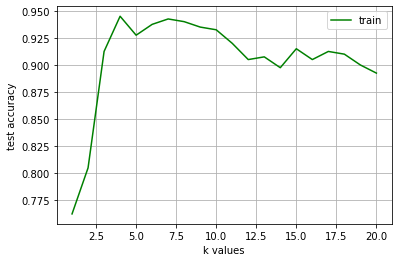

In [149]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_test = []
k=np.arange(1,21,1)
for each in k:
    X= SelectKBest(f_classif, k=each).fit_transform(features, target)
    scaler1 = StandardScaler()
    features_scaled1 = scaler1.fit_transform(X)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_scaled1,target,test_size = 0.2,random_state = 42)
    svm.fit(Xtrain,Ytrain)
    accuracy_list_test.append(svm.score(Xtest,Ytest))

plt.plot(k,accuracy_list_test,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("test accuracy")
plt.legend()
plt.grid()
plt.show()   

As we can see from above graph that using 4 features, we get the highest test accuracy

In [150]:
d = {'best features number': k, 'test_score': accuracy_list_test}
df = pd.DataFrame(data=d)
print("max accuracy:",df["test_score"].max())
print("max accuracy id:",df["test_score"].idxmax())
print("max accuracy values: \n", df.iloc[3])

max accuracy: 0.945
max accuracy id: 3
max accuracy values: 
 best features number    4.000
test_score              0.945
Name: 3, dtype: float64


In [151]:
features = mobiledata.drop("price_range",axis=1)
selector = SelectKBest(f_classif, k = 4)
X = selector.fit_transform(features, target)
print("These 4 features are giving highest accuracy ->", features.columns.values[selector.get_support()])
features = mobiledata.drop("price_range",axis=1).values

These 4 features are giving highest accuracy -> ['battery_power' 'px_height' 'px_width' 'ram_MB']


In [0]:
scaler2 = StandardScaler()
features_scaled2 = scaler2.fit_transform(X)

In [153]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features_scaled2,target,test_size = 0.2,random_state = 42)
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(Xtrain,Ytrain)
print("Train accuracy: ", svm.score(Xtrain, Ytrain))
print("Test accuracy: ", svm.score(Xtest, Ytest))

Train accuracy:  0.963125
Test accuracy:  0.945


So, now as we can see that, initially train accuracy was 0.9825 and now it is 0.9631, on the other hand, test accuracy was 0.8925 and now it is 0.945 which shows performance improved of our model with feature selection.

**Analysis - Overfitting is removed with feature selection**

# **Tuning of Hyper Parameters**

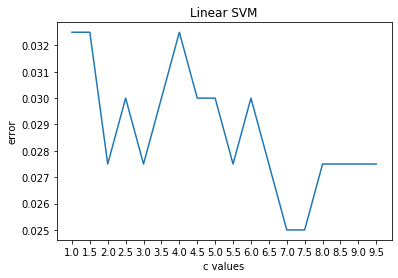

In [154]:
c_range =  np.arange(1,10,0.5)
svm_c_error = []
for c_value in c_range:
    model = SVC(kernel='linear', C=c_value)
    model.fit(Xtrain, ytrain)
    error = 1. - model.score(Xtest, ytest)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
plt.xticks(c_range)
plt.show()

In [155]:
frame = pd.DataFrame({"Cvalues":c_range,"error":svm_c_error},index=range(1,(len(c_range)+1)))
id = frame["error"].idxmin()
Best_C_Value = frame["Cvalues"][id]
Best_C_Value

7.0

In [0]:
param_grid = {"kernel":["linear","rbf","poly"],'gamma': ["auto",0.01,0.001,0.0001,1],'decision_function_shape' : ["ovo","ovr"]}

In [0]:
from sklearn.model_selection import GridSearchCV
svm1 = SVC(random_state=42,C=Best_C_Value)
gs = GridSearchCV(svm1,param_grid,cv =5,scoring = "accuracy")

In [158]:
gs.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=7.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['auto', 0.01, 0.001, 0.0001, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [159]:
Ypred = gs.best_estimator_.predict(Xtest)
print("Training Accuracy:",gs.best_estimator_.score(Xtrain,Ytrain))
print("Testing Accuracy:",gs.best_estimator_.score(Xtest,Ytest))

Training Accuracy: 0.960625
Testing Accuracy: 0.975


# **Evaluation -Confusion Metrics, Precision, Accuracy, Recall**

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest,Ypred)
cm = pd.DataFrame(cm, columns=["low price","medium price","high price","very high price"],index=["low price","medium price","high price","very high price"])
print("Confusion matrix after tuning parameters:")
cm

Confusion matrix after tuning parameters:


,low price,medium price,high price,very high price
low price,103,2,0,0
medium price,0,91,0,0
high price,0,2,88,2
very high price,0,0,4,108


In [161]:
target_names = ["Low price","Medium price","High Price","Very High Price"]
from sklearn.metrics import classification_report
print(classification_report(Ytest,Ypred,target_names=target_names))


                 precision    recall  f1-score   support

      Low price       1.00      0.98      0.99       105
   Medium price       0.96      1.00      0.98        91
     High Price       0.96      0.96      0.96        92
Very High Price       0.98      0.96      0.97       112

       accuracy                           0.97       400
      macro avg       0.97      0.98      0.97       400
   weighted avg       0.98      0.97      0.98       400



# **Analysis of SVM model**
 









Initial Accuracy by directly applying SVM
Training Accuracy : 0.9825 | Testing Accuracy : 0.8925

After Feature Selection
Training Accuracy : 0.963125 | Testing Accuracy : 0.945
(Removes Overfiiting with feature selection)

After Hyper-parameter Tuning
Training Accuracy : 0.960625 | Testing Accuracy : 0.975

# **Regression**

## **Decision Tree Regressor**

In [0]:
mobiledata = pd.read_csv('mobiledata.csv')
mobiledata["price_range"].replace(["low price","medium price","high price","very high price"],[0,1,2,3],inplace=True)



In [0]:
from sklearn.tree import DecisionTreeRegressor

In [164]:
mobiledata.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_camera_MP,has_4G,int_memory_GB,mobile_depth,mobile_width,n_cores,back_camera_MP,px_height,px_width,ram_MB,sc_h,sc_w,talk_time,has_3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [0]:
features = mobiledata.drop("price_range",axis=1)
target = mobiledata["price_range"]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state = 42)

In [166]:
Xtrain.shape, Ytrain.shape

((1600, 20), (1600,))

In [167]:
Xtest.shape, Ytest.shape

((400, 20), (400,))

In [168]:
Ytrain.value_counts()

1    409
2    408
0    395
3    388
Name: price_range, dtype: int64

In [169]:
Ytest.value_counts()

3    112
0    105
2     92
1     91
Name: price_range, dtype: int64

In [0]:
dt_model = DecisionTreeRegressor(random_state=42)

In [171]:
dt_model.fit(Xtrain,Ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [172]:
print("Training Accuracy",dt_model.score(Xtrain,Ytrain))
print("Testing Accuracy",dt_model.score(Xtest,Ytest))

Training Accuracy 1.0
Testing Accuracy 0.8875767639908375


In [0]:
MaxDepth = np.arange(1,21,1)
train_accuracy = []
test_accuracy = []
for i in MaxDepth:
  dt_model = DecisionTreeRegressor(max_depth=i,random_state=42)
  dt_model.fit(Xtrain,Ytrain)
  train_accuracy.append(dt_model.score(Xtrain,Ytrain))
  test_accuracy.append(dt_model.score(Xtest,Ytest))




In [174]:
frame = pd.DataFrame({'MaxDepth':range(1,21),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy},index = range(1,21))
max_depth =  frame['test_accuracy'].idxmax()
frame


,MaxDepth,train_accuracy,test_accuracy
1,1,0.663135,0.697914
2,2,0.818250,0.825571
3,3,0.856576,0.851360
4,4,0.895513,0.894125
5,5,0.931091,0.900729
6,6,0.954415,0.904276
7,7,0.977476,0.892741
8,8,0.990824,0.902148
9,9,0.997261,0.883840
10,10,0.998310,0.887930


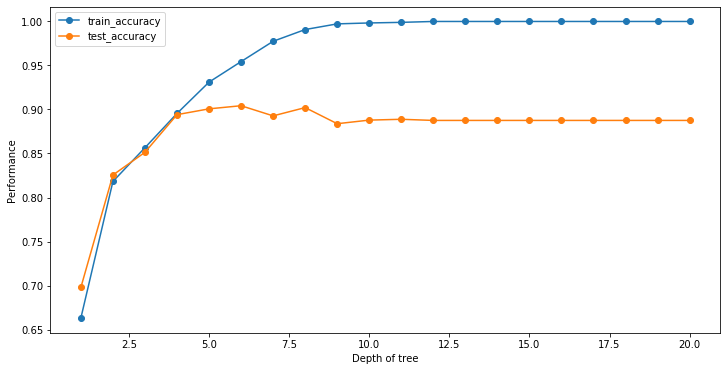

In [175]:
plt.figure(figsize=(12,6))
plt.plot(frame["MaxDepth"],frame["train_accuracy"],marker="o",label="train_accuracy")
plt.plot(frame["MaxDepth"],frame["test_accuracy"],marker="o",label="test_accuracy")
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend()

In [176]:
print("We should choose ",max_depth," for our max_depth parameter as it is giving the highest test accuracy for our model")

We should choose  6  for our max_depth parameter as it is giving the highest test accuracy for our model


Let's consider another hyper-parameter `min_samples_split` for our model.

In [0]:
minsample = np.arange(2,31,1)
train_accuracy = []
test_accuracy = []
for i in minsample:
  dt_model = DecisionTreeRegressor(max_depth=max_depth,random_state=42,min_samples_split = i)
  dt_model.fit(Xtrain,Ytrain)
  train_accuracy.append(dt_model.score(Xtrain,Ytrain))
  test_accuracy.append(dt_model.score(Xtest,Ytest))

In [178]:
frame_minsamples = pd.DataFrame({'min_samples':range(2,31),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy},index = range(1,30))
min_sample = (frame_minsamples['test_accuracy'].idxmax())
min_sample = min_sample + 1
frame_minsamples

,min_samples,train_accuracy,test_accuracy
1,2,0.954415,0.904276
2,3,0.954415,0.904276
3,4,0.954076,0.904276
4,5,0.954076,0.904276
5,6,0.954076,0.904276
6,7,0.953398,0.901256
7,8,0.952908,0.904973
8,9,0.952908,0.904973
9,10,0.951890,0.905181
10,11,0.951890,0.905181


Let's plot the same thing as I discussed above.

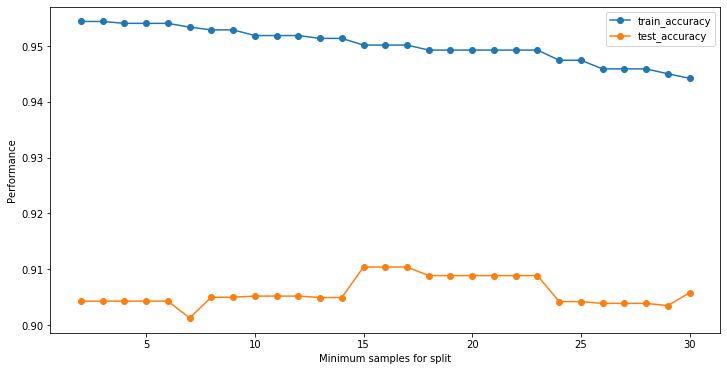

In [179]:
plt.figure(figsize=(12,6))
plt.plot(frame_minsamples["min_samples"],frame_minsamples["train_accuracy"],marker="o",label="train_accuracy")
plt.plot(frame_minsamples["min_samples"],frame_minsamples["test_accuracy"],marker="o",label="test_accuracy")
plt.xlabel("Minimum samples for split")
plt.ylabel("Performance")
plt.legend()


So, taking the best value of max_depth hyper-parameter, I decided to go for another hyper-parameter named `min_samples_split`. So, I looped for that hyper parameter with best value of max_depth and accuracy did increase from 0.904276 to 0.910389. 

In [180]:
print("The best value for min_samples_split for best split is at->", min_sample)

The best value for min_samples_split for best split is at-> 15


In [181]:
dt_model = DecisionTreeRegressor(max_depth=6,min_samples_split=15,random_state=42)
dt_model.fit(Xtrain,Ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=15, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [182]:
Ypred = dt_model.predict(Xtest)
print("Training Accuracy",dt_model.score(Xtrain,Ytrain))
print("Testing Accuracy",dt_model.score(Xtest,Ytest))

Training Accuracy 0.9501826314298393
Testing Accuracy 0.9103892970884714


# **Hyper-parameter Tuning**

In [183]:
param_grid = {"min_samples_leaf":[2,4,6,8,10],"max_features":["auto","sqrt","log2"],"max_depth": [6],"min_samples_split":[15]}
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(dt_model,param_grid,cv=5)
gd.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=6,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=15,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split

In [184]:
print("training accuracy: ",gd.best_estimator_.score(Xtrain,Ytrain))
print("Testing accuracy: ",gd.best_estimator_.score(Xtest,Ytest))

training accuracy:  0.9433075460622327
Testing accuracy:  0.912194609886723


So initially test accuracy was around 0.88 and now after tuning parameters it increases to 0.91.

# **Tree Vizualization**

Now, let's visualize our Decision Tree.

In [185]:
!pip install graphviz

In [0]:
from sklearn import tree
decision_tree = tree.export_graphviz(dt_model,out_file = "tree.dot",feature_names = Xtrain.columns,max_depth=2,filled=True)

In [0]:
!dot -Tpng tree.dot -o tree.png

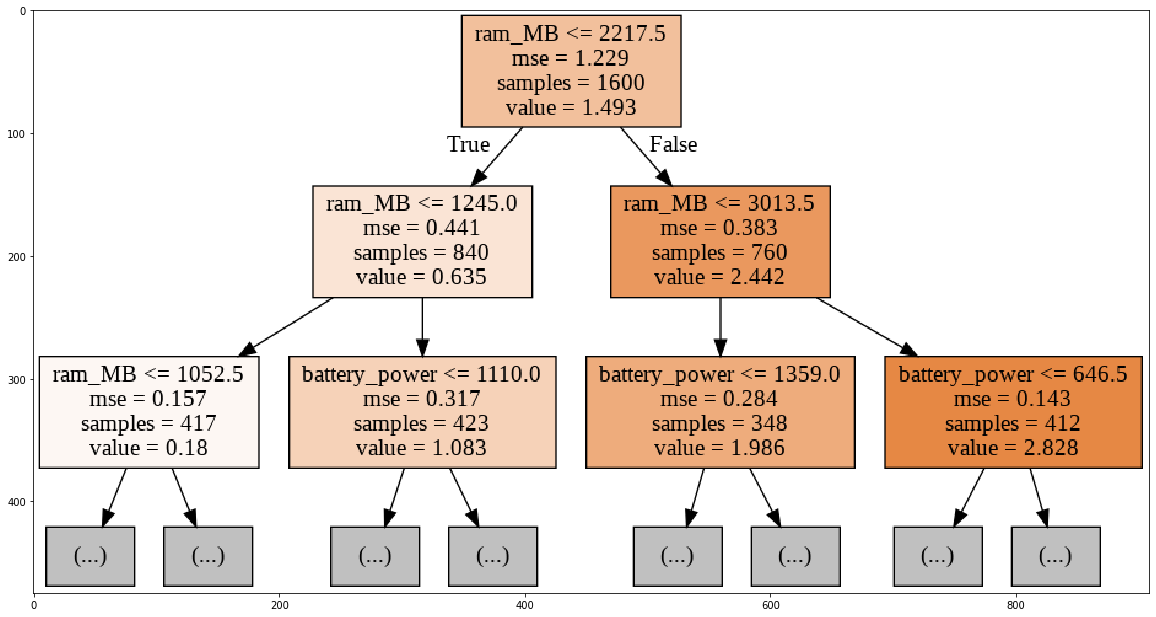

In [188]:
image = plt.imread('tree.png')
plt.figure(figsize=(20,15))
plt.imshow(image)

Graph of Decision Tree with depth of 2.

# **Evaluation - R2 Score**

In [189]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
print(r2_score(Ytest,Ypred))

0.9103892970884714


# **Analysis of Decision Tree model**



Initially applying decision tree regressor model to data, 
training accuracy was 1 - 
testing accuracy was 0.88 (**clearly overfiiting**)
So, we tune 2 parameters - `max_depth` and `min_samples_split` individually and got training accuracy of 0.95 and testing of 0.9103 which was slight better than before.

We also tuned parameters but it didn't improve much performance on testing former was 0.9103 and letter (after tuning it was 0.9121) 


# **Linear Rgeression**

In [0]:
mobiledata = pd.read_csv('mobiledata.csv')
mobiledata["price_range"].replace(["low price","medium price","high price","very high price"],[0,1,2,3],inplace=True)



In [0]:
features = mobiledata.drop("price_range",axis=1)
target = mobiledata["price_range"]

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state = 42)

In [192]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
print("Training Accuracy:",lm.score(Xtrain,Ytrain))
print("Testing Accuracy:",lm.score(Xtest,Ytest))

Training Accuracy: 0.9175924509487374
Testing Accuracy: 0.9215339010437136


Regularization 

In [194]:
from sklearn.linear_model import Ridge
reglr = Ridge(alpha = 1100)
reglr.fit(Xtrain,Ytrain)

Ridge(alpha=1100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [195]:
print("Training Accuracy:",reglr.score(Xtrain,Ytrain))
print("Testing Accuracy:",reglr.score(Xtest,Ytest))

Training Accuracy: 0.917409106634911
Testing Accuracy: 0.921541897667249


# **Analysis of Linear Regression model**

So, at first we directly applied regression model to data and get training accuracy of 0.9175 and testing of 0.9215

We then applied regularization and it surprised us as testing accuracy was almost same.

So, our analysis is that Decision tree definitely overfits the data. But on ther other hand Linear Regression does a very good job of fitting data.